In [65]:
import random

def calc_class(x1, x2):
    r = 0.1 * x1 + 0.2 * x2 - 0.5
    return 1 if r > 1 else 0


def mkdataset(filename, start, stop, num):
    x1 = [random.randrange(start, stop) for i in range(num)]
    x2 = [random.randrange(start, stop) for i in range(num)]

    with open(filename, 'w') as f:
        f.writelines("X1,X2,Y\n")
        for i in range(num):
            f.writelines("%d,%d,%d\n" % (x1[i], x2[i], calc_class(x1[i], x2[i])))

mkdataset("data.csv", 0, 10, 200)
mkdataset("test.csv", 1, 8, 100)

In [66]:
import tensorflow as tf  
import pandas as pd  

train = pd.read_csv('data.csv')
test = pd.read_csv('test.csv')

x_train = np.float32(train[['X1', 'X2']].T)  
y_train = np.float32(train['Y'].T)  
  
x_test = np.float32(test[['X1', 'X2']].T)  
y_test = np.float32(test['Y'].T)  
  
b = tf.Variable(tf.zeros([1]))
w = tf.Variable(tf.random_uniform([1, 2]))
  
y = tf.matmul(w, x_train) + b  
  
loss = tf.reduce_mean(tf.square(y - y_train))  
  
optimizer = tf.train.GradientDescentOptimizer(0.005)  
train = optimizer.minimize(loss)  
  
sess = tf.Session()  
sess.run(tf.global_variables_initializer())  
  
for step in range(0, 1000):  
    sess.run(train)
    if step % 100 == 0:
        curr_w = sess.run(w)
        curr_b = sess.run(b)
        curr_loss = sess.run(loss)
        print('step: %4d, w1=%.8f, w2=%.8f, b=%.8f, loss=%.8f' % (step, curr_w[0][0], curr_w[0][1], curr_b, curr_loss))

step:    0, w1=0.23379779, w2=0.18910787, b=-0.02692059, loss=2.50901222
step:  100, w1=0.01212080, w2=0.11135787, b=-0.10796274, loss=0.07832701
step:  200, w1=0.01622294, w2=0.11522222, b=-0.15068792, loss=0.07460484
step:  300, w1=0.01963454, w2=0.11838905, b=-0.18597451, loss=0.07206593
step:  400, w1=0.02245218, w2=0.12100450, b=-0.21511753, loss=0.07033414
step:  500, w1=0.02477926, w2=0.12316458, b=-0.23918660, loss=0.06915286
step:  600, w1=0.02670119, w2=0.12494860, b=-0.25906524, loss=0.06834712
step:  700, w1=0.02828850, w2=0.12642203, b=-0.27548298, loss=0.06779751
step:  800, w1=0.02959945, w2=0.12763889, b=-0.28904212, loss=0.06742263
step:  900, w1=0.03068217, w2=0.12864390, b=-0.30024064, loss=0.06716691


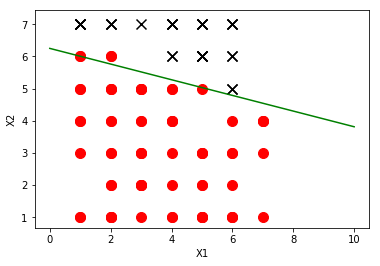

In [67]:
import matplotlib.pyplot as plt 

test_negative = test.loc[test['Y']==0][['X1', 'X2']]
test_positive = test.loc[test['Y']==1][['X1', 'X2']]  

plt.scatter(test_negative['X1'], test_negative['X2'], marker='o', s=100, c='red')  
plt.scatter(test_positive['X1'], test_positive['X2'], marker='x', s=100, c='black')  

plt.xlabel('X1')  
plt.ylabel('X2')  

# w1*x + w2*y + b = 0.5 => y = (0.5 - b - w1*x) / w2  
line_x = np.arange(0, 11)  
line_y = (0.5 - sess.run(b) - lx*sess.run(w)[0][0]) / sess.run(w)[0][1]

plt.plot(line_x, line_y, color='green')  
plt.show() 